In [205]:
import pandas as pd
churn_df = pd.read_csv(r'C:\Users\seans\Documents\WGU\D207\churn_clean.csv')

#Import Other Packages
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import matplotlib as mpl
import matplotlib.pyplot as mpl
import seaborn as sb

In [206]:
#The eight survey items were not labeled properly and need to fixed
churn_df.rename(columns = 
{'Item1':'item1_responses',
'Item2':'item2_fixes',
'Item3':'item3_replacements',
'Item4':'item4_reliability',
'Item5':'item5_options',
'Item6':'item6_respectfulness',
'Item7':'item7_courteous',
'Item8':'item8_listening'},
inplace=True)

In [207]:
#View Data Types
print(churn_df.select_dtypes(include="float").info())
print(churn_df.select_dtypes(include="integer").info())
print(churn_df.select_dtypes(include="object").info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Income              10000 non-null  float64
 3   Outage_sec_perweek  10000 non-null  float64
 4   Tenure              10000 non-null  float64
 5   MonthlyCharge       10000 non-null  float64
 6   Bandwidth_GB_Year   10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CaseOrder             10000 non-null  int64
 1   Zip                   10000 non-null  int64
 2   Population            10000 non-null  int64
 3   Children              10000 non-null  int64
 4 

item2_fixes    1    2     3     4     5    6   7
Churn                                           
No           160  973  2519  2507  1025  155  11
Yes           57  387   896   905   343   60   2
item2_fixes         1         2         3         4         5         6  \
Churn                                                                     
No           0.021769  0.132381  0.342721  0.341088  0.139456  0.021088   
Yes          0.021509  0.146038  0.338113  0.341509  0.129434  0.022642   

item2_fixes         7  
Churn                  
No           0.001497  
Yes          0.000755  


Text(0.5, 1.0, 'Churn and item2_fixes')

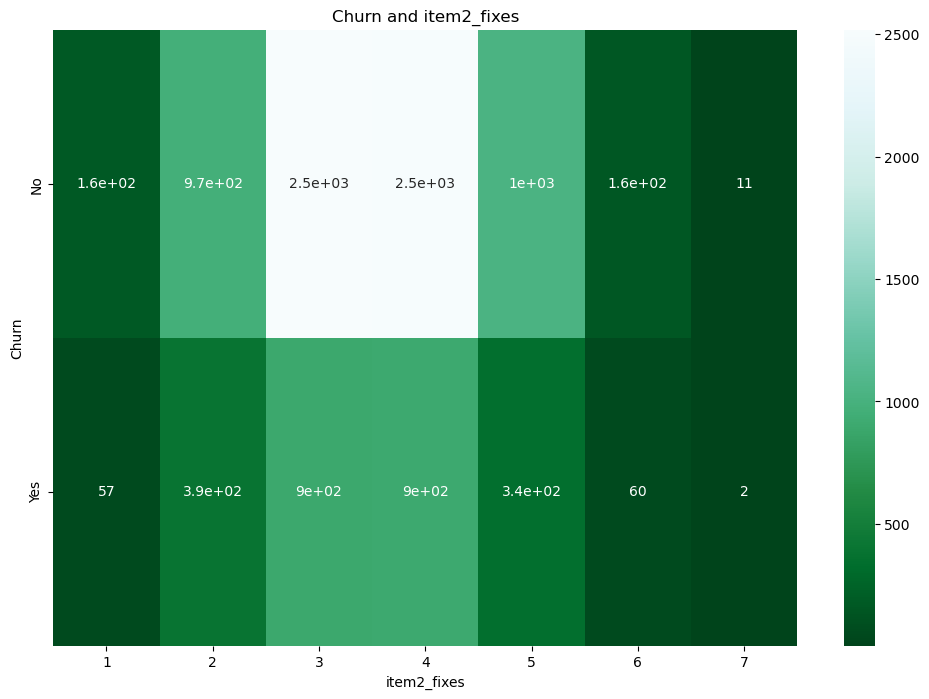

In [208]:
#Begin Chi Square Analysis by creating contingency
contingency = pd.crosstab(churn_df['Churn'], churn_df['item2_fixes'])
print(contingency)

contingency_pcnt = pd.crosstab(churn_df['Churn'], churn_df['item2_fixes'], normalize='index')
print(contingency_pcnt)

mpl.figure(figsize=(12,8))
sb.heatmap(contingency, annot=True, cmap="BuGn_r")
mpl.title('Churn and item2_fixes')

In [209]:
# Chi-square Test cont. Degrees of freedom
stat, p, dof, expected = chi2_contingency(contingency)
print('dof=%d' % dof)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')



#Code to help us see the results of our test
alpha = 1 - prob
if p <= alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')
print(p)

dof=6
probability=0.950, critical=12.592, stat=5.272
Fail to Reject Null Hypothesis
Fail to Reject Null Hypothesis
0.5093789499498207


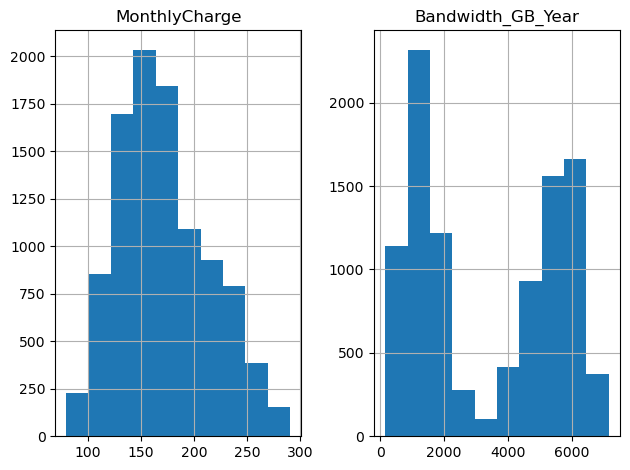

In [210]:
#Univariate Statistics
#Histograms
churn_df[['MonthlyCharge', 'Bandwidth_GB_Year']].hist()
mpl.tight_layout()

Text(0.5, 1.0, 'Phone')

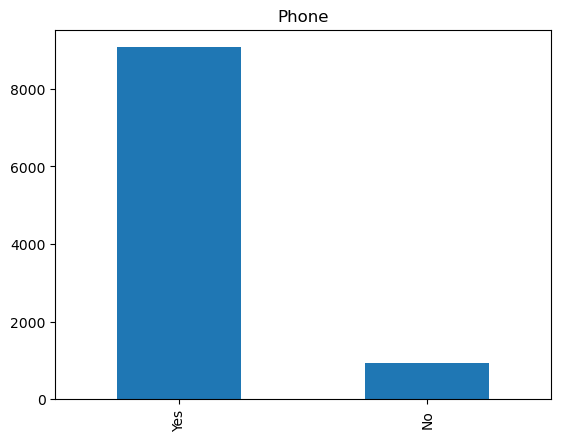

In [211]:
churn_df['Phone'].value_counts().plot.bar()
mpl.title('Phone')

Text(0.5, 1.0, 'TechSupport')

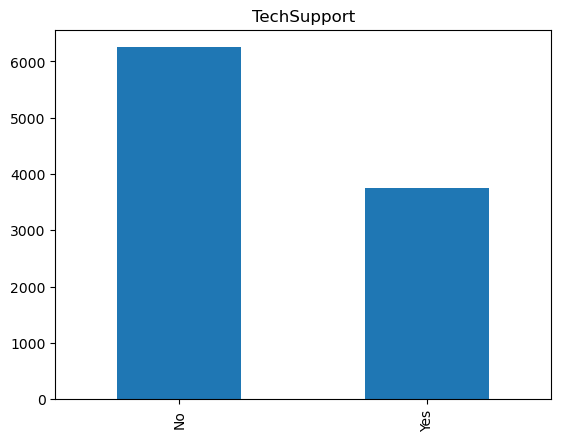

In [212]:
churn_df['TechSupport'].value_counts().plot.bar()
mpl.title('TechSupport')

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


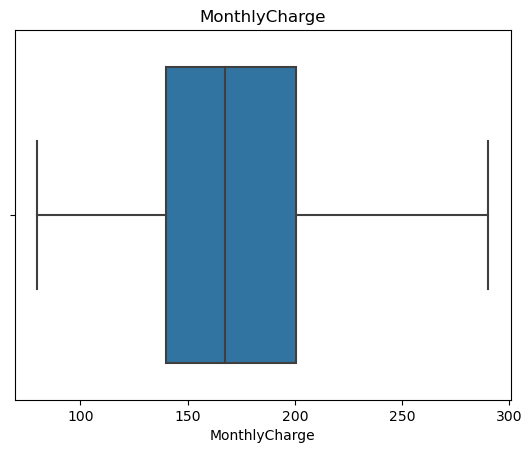

<Figure size 640x480 with 0 Axes>

In [213]:
#Box Plots
sb.boxplot('MonthlyCharge', data=churn_df)
mpl.title('MonthlyCharge')
mpl.show()
mpl.savefig(r'C:\Users\seans\Documents\WGU\D207\MCbox.jpeg')

C:\Users\seans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


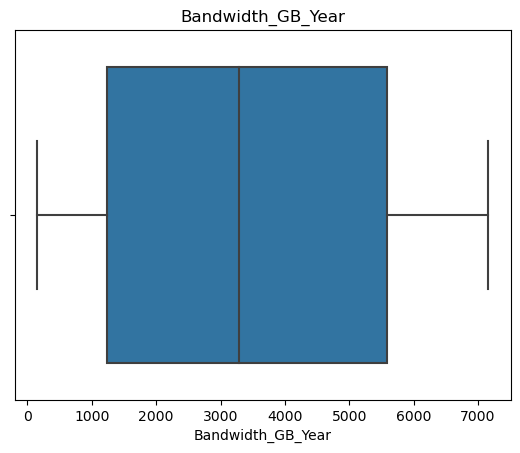

In [214]:
sb.boxplot('Bandwidth_GB_Year', data=churn_df)
mpl.title('Bandwidth_GB_Year')
mpl.show()

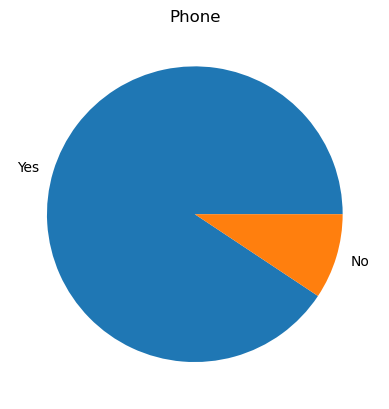

In [215]:
mpl.pie(churn_df['Phone'].value_counts(),
        labels=['Yes','No'],shadow=False)
mpl.title("Phone")
mpl.savefig(r'C:\Users\seans\Documents\WGU\D207\Ppie.jpeg')

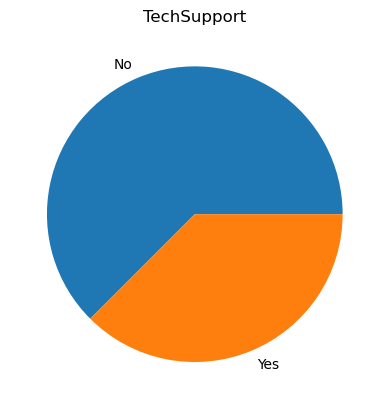

In [216]:
mpl.pie(churn_df['TechSupport'].value_counts(),
        labels=['No','Yes'],shadow=False)
mpl.title("TechSupport")
mpl.savefig(r'C:\Users\seans\Documents\WGU\D207\TSpie.jpeg')

<AxesSubplot:>

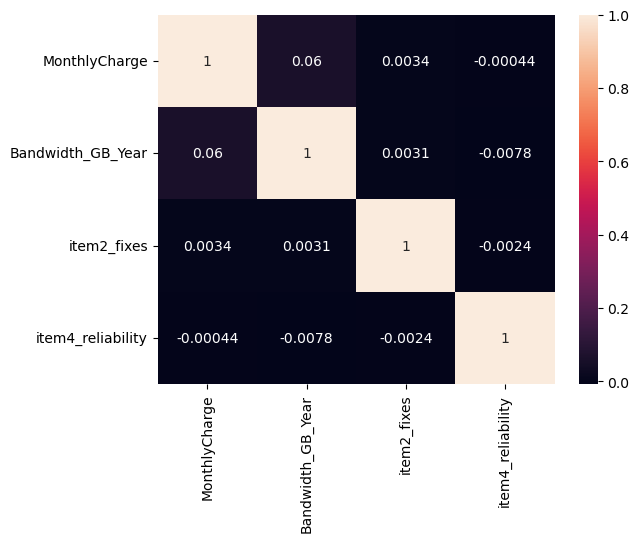

In [218]:
# Bivariate statistics
#Initial Heatmap to show all of our variables- 1 shows a strong positive correlation, -1 shows a strong negative correlation, 0 shows no correlation.

churn_bv = churn_df[['MonthlyCharge', 'Bandwidth_GB_Year', 'item2_fixes', 'item4_reliability']]
churn_bv.corr()
sb.heatmap(churn_bv.corr(), annot=True)

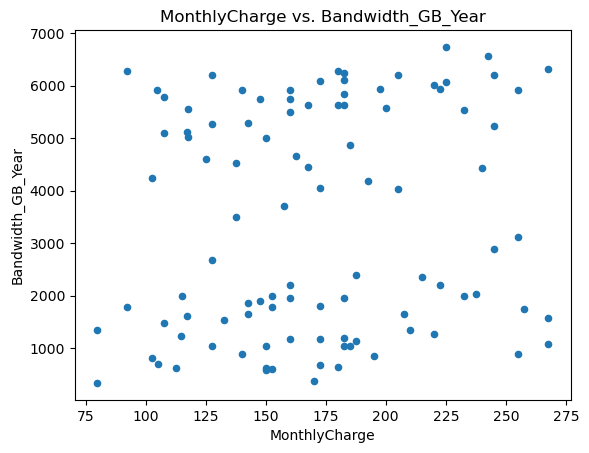

In [219]:
#Let’s do a scatterplot now for our continuous variables
churn_bv[churn_bv['MonthlyCharge'] < 400].sample(100).plot.scatter(x='MonthlyCharge',
y = 'Bandwidth_GB_Year')
mpl.title('MonthlyCharge vs. Bandwidth_GB_Year')
mpl.savefig(r'C:\Users\seans\Documents\WGU\D207\MCBWBox.jpeg')

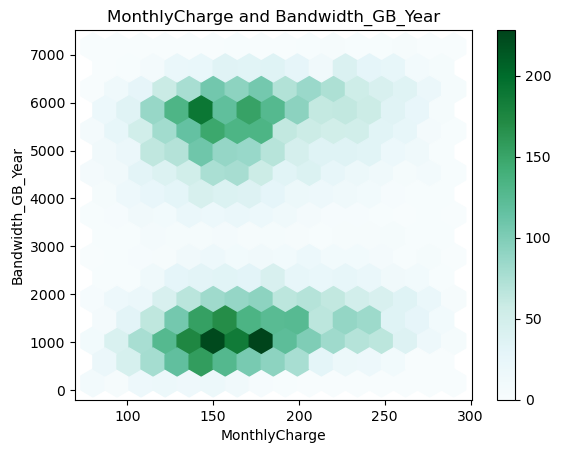

In [220]:
#Heatmap
churn_bv[churn_bv['MonthlyCharge'] < 400].plot.hexbin(x='MonthlyCharge', y = 'Bandwidth_GB_Year', gridsize=15)
mpl.title('MonthlyCharge and Bandwidth_GB_Year')
mpl.savefig(r'C:\Users\seans\Documents\WGU\D207\MCBWhex.jpeg')

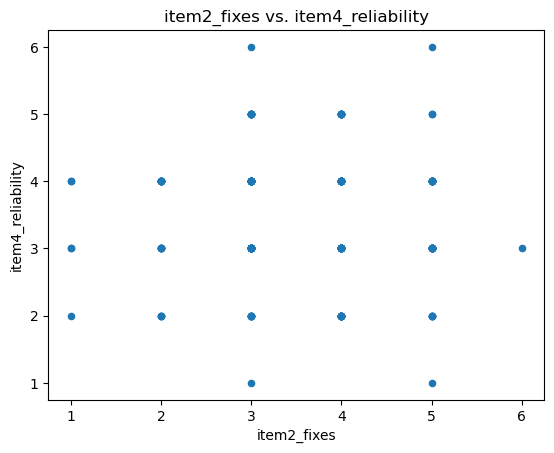

In [221]:
#Let’s do a scatterplot now for our categorical variables
churn_bv[churn_bv['item2_fixes'] < 7].sample(200).plot.scatter(x='item2_fixes',
y = 'item4_reliability')
mpl.title('item2_fixes vs. item4_reliability')
mpl.savefig(r'C:\Users\seans\Documents\WGU\D207\item24Box.jpeg')

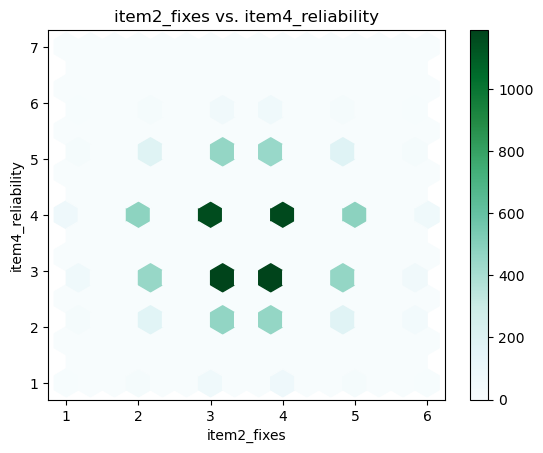

In [222]:
#Final Heatmap
churn_bv[churn_bv['item2_fixes'] < 7].plot.hexbin(x='item2_fixes', y = 'item4_reliability', gridsize=15)
mpl.title('item2_fixes vs. item4_reliability')
mpl.savefig(r'C:\Users\seans\Documents\WGU\D207\item24hex.jpeg')